In [54]:
#-------------------------------------------------------------
# Importing Modules                                          $
#-------------------------------------------------------------
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis, skew
from matplotlib.collections import LineCollection
from sklearn.utils import check_random_state
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
#-------------------------------------------------------------

# Linear Regression of Canadian Dollar and Spot Oil Price
We want to use a linear regression to model Canadian Dollar exchange rate with Spot Oil Prices. CAD is a commodity currency meaning that it's value is dependent on $x$ commodity, in this case crude oil. Canada's biggest export is crude oil, so it's value is significantly dependent on the price of oil. 

Linear regression is finding the line with the smallest distance from each point. We call this line our regression line we use a function with a feature, intercept, and coefficient as inputs to output our line. 

Formula:

- $y = \beta_0 + \beta_1 x+e$

- where:

    - $y$ is the dependent variable (response)
    - $x$ is the independent variable (feature)
    - $e$ is the random error term
    - $\beta_0$ is the intercept
    - $\beta_1$ is the coefficient

### Ok let's import our data:

In [55]:
data = pd.read_csv('./Data/dataset.csv')[-1545:]
data = data[['CAD$ Exchange Rate','Oil Prices']]
data.head()

,CAD$ Exchange Rate,Oil Prices
7540,1.1725,52.72
7541,1.1785,50.05
7542,1.1802,47.98
7543,1.1851,48.69
7544,1.1812,48.80


### Now let's get a quick statistical peep at the data

In [56]:
data.describe()

,CAD$ Exchange Rate,Oil Prices
count,1545.000000,1545.000000
mean,1.309186,51.009430
std,0.043434,10.776909
min,1.172500,12.170000
25%,1.281500,44.870000
50%,1.313400,50.990000
75%,1.333100,58.340000
max,1.459200,77.410000


### Plotting our feature (Oil) and response (CAD)

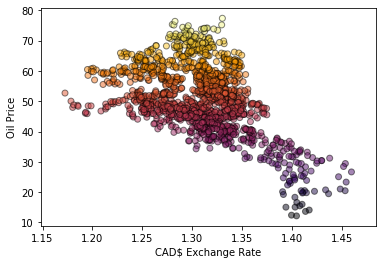

In [57]:
cmaps = OrderedDict()
x = data['CAD$ Exchange Rate'].values
y = data['Oil Prices'].values
plt.xlabel('CAD$ Exchange Rate')
plt.ylabel('Oil Price')
plt.scatter(x,y,c=y,cmap='inferno',edgecolor='black',linewidth=1,alpha=0.5)

### How correlated is the data?

In [58]:
data.corr()

,CAD$ Exchange Rate,Oil Prices
CAD$ Exchange Rate,1.000000,-0.496979
Oil Prices,-0.496979,1.000000


### Let's see what kind of distributions we're working with

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ac1b62a10>,
      dtype=object)

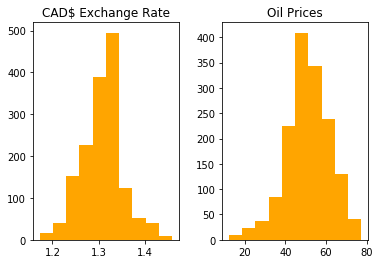

In [59]:
data.hist(grid=False,color='orange')

### Checking skewness and kurtosis

In [60]:
# Calculate excess kurtosis using fisher method
x_kurtosis = kurtosis(x, fisher=True)
y_kurtosis = kurtosis(y, fisher=True)
# Calculate Skewness
x_skew = skew(x)
y_skew = skew(y)
# Calling
display("CAD Excess Kurtosis: {:.2}".format(x_kurtosis))
display("OIL Excess Kurtosis: {:.2}".format(y_kurtosis))
display("CAD Skew: {:.2}".format(x_skew))
display("OIL Skew: {:.2}".format(y_skew))

'CAD Excess Kurtosis: 0.67'

'OIL Excess Kurtosis: 0.49'

'CAD Skew: 0.055'

'OIL Skew: -0.35'

### Testing skewness and kurtosis

In [61]:
# Kurtosis Test
display('CAD')
display(stats.kurtosistest(x))
display('OIL')
display(stats.kurtosistest(y))
# Skew Test
display('CAD')
display(stats.skewtest(x))
display('OIL')
display(stats.skewtest(y))

'CAD'

KurtosistestResult(statistic=4.2242395675905176, pvalue=2.397489141319927e-05)

'OIL'

KurtosistestResult(statistic=3.3263826530819878, pvalue=0.0008798105647461577)

'CAD'

SkewtestResult(statistic=0.8937199695398927, pvalue=0.3714717380708088)

'OIL'

SkewtestResult(statistic=-5.539045709266522, pvalue=3.0412426652848174e-08)

### Training/Testing & Predicted

In [62]:
predict = 'CAD$ Exchange Rate'
X = np.array(data.drop([predict],1))
Y = np.array(data[predict].values)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)
#---------------------------------------------------------------
linear = LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
acc = acc.astype(str)
intercept = linear.intercept_
coefficient = linear.coef_[0]
print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))
print('Accuracy: ',acc,'\n')
#-------------------------------------------------------------
predictions = linear.predict(x_test)
#-------------------------------------------------------------

The Coefficient for our model is -0.002
The intercept for our model is 1.409
Accuracy:  0.2521417453973799 



### Visualizing Model

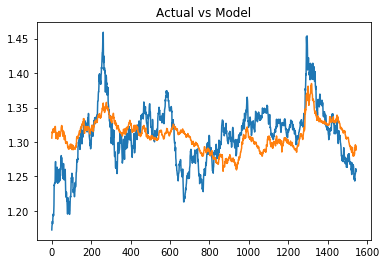

In [63]:
predictions = linear.predict(X)
plt.plot(Y)
plt.plot(predictions)
plt.title('Actual vs Model')
plt.show()

### Confidence Interval

In [64]:
y_predict = linear.predict(x_test)
# Defining input
X1 = sm.add_constant(X)
# Render a OLS model.
model = sm.OLS(Y, X1)
# Fitting Data
est = model.fit()
# Setting Confidence Interval
est.conf_int()

array([[ 1.40225007,  1.42045946],
       [-0.00217758, -0.00182831]])

### Error's

In [65]:
# Calculating mean squared error
model_mse = mean_squared_error(y_test, y_predict)
# Calculating mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)
# Calulcating troot mean squared error
model_rmse =  math.sqrt(model_mse)
# Printing Output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.00154
MAE 0.0322
RMSE 0.0393


### R2

In [66]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.25


### Residual distribution

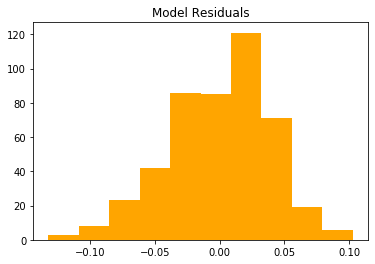

In [67]:
# Visualize Model Residuals via Hist Distribution
list_ = []
for x in range(len(y_test)):
    list_.append(y_test[x] - y_predict[x])
plt.hist(list_,color = 'orange')
plt.title("Model Residuals")
plt.show()

### Summerizing our results

In [68]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     506.1
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.66e-97
Time:                        02:25:55   Log-Likelihood:                 2873.3
No. Observations:                1545   AIC:                            -5743.
Df Residuals:                    1543   BIC:                            -5732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4114      0.005    304.060      0.0

# Plotting our regression line

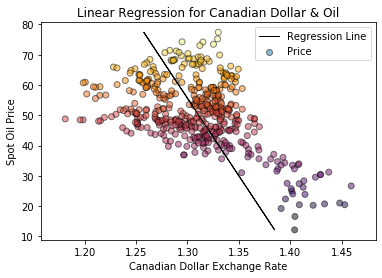

In [69]:
# Convert to array
X3_test = np.array(x_test)
# Color Map
cmaps = OrderedDict()                    
# Plotting
plt.scatter(y_test, x_test,  c=X3_test, cmap='inferno', edgecolor='black', linewidth=1, alpha=0.50, label='Price')
plt.plot(y_predict, x_test, color='black', linewidth = 1, linestyle= '-',label ='Regression Line')
plt.title("Linear Regression for Canadian Dollar & Oil")
plt.xlabel("Canadian Dollar Exchange Rate")
plt.ylabel("Spot Oil Price")
plt.legend()
plt.show()